<a href="https://colab.research.google.com/github/SagnikAdak/sagnik2/blob/main/Impact%20of%20AI%20in%20healthcare(code%20only).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

df=pd.read_csv("/healthcare_AI.csv")

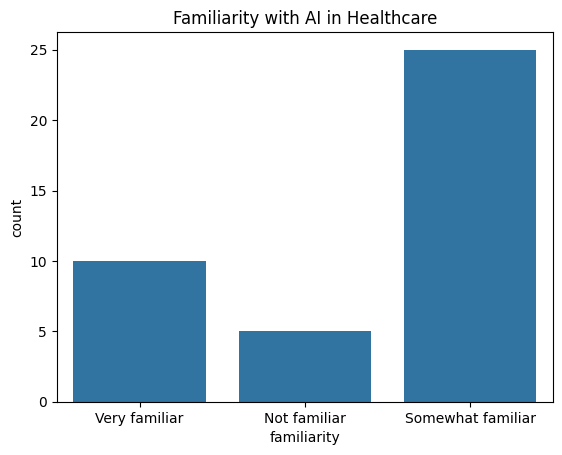

In [4]:
# Plot for familiarity
sns.countplot(x='familiarity', data=df)
plt.title('Familiarity with AI in Healthcare')
plt.show()

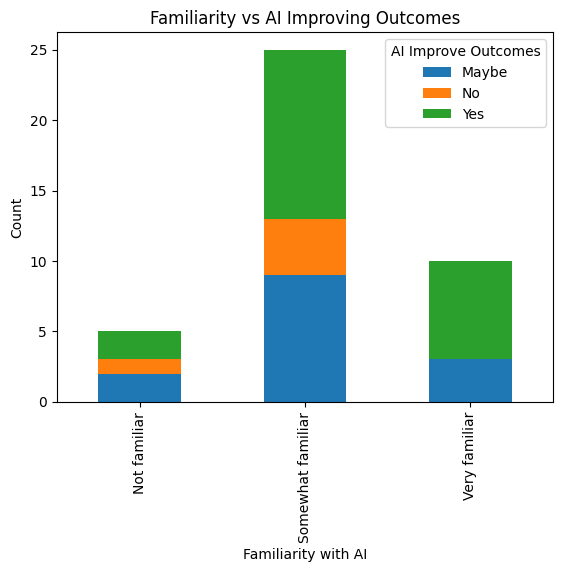

In [13]:
# Group data and create a crosstab between 'familiarity' and 'AI improve outcomes'
cross_tab = pd.crosstab(df['familiarity'], df['AI improve outcomes'])

# Plotting stacked bar chart
cross_tab.plot(kind='bar', stacked=True)
plt.title('Familiarity vs AI Improving Outcomes')
plt.xlabel('Familiarity with AI')
plt.ylabel('Count')
plt.legend(title='AI Improve Outcomes')
plt.show()

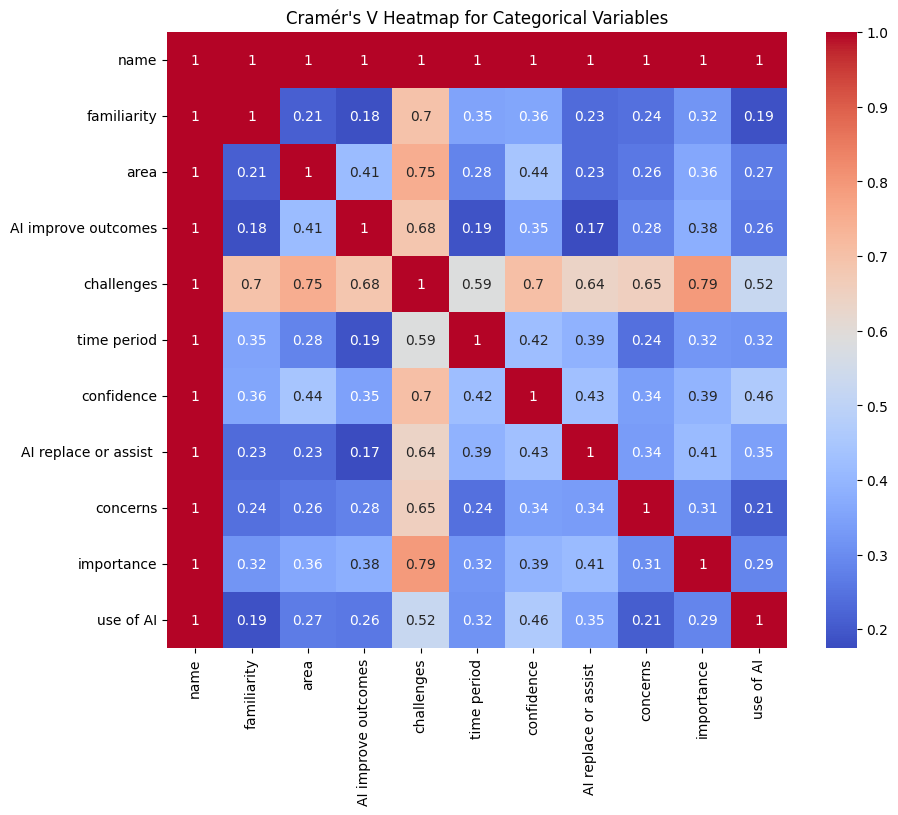

In [15]:
# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Calculate Cramér's V for each pair of columns
categorical_columns = df.columns
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to float for heatmap
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title("Cramér's V Heatmap for Categorical Variables")
plt.show()


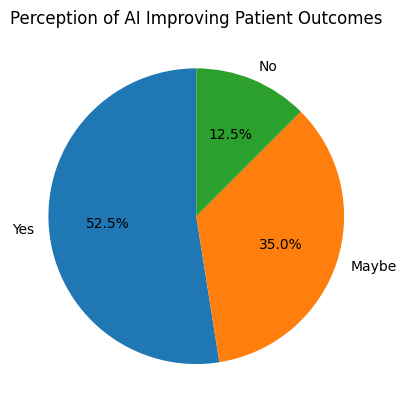

In [7]:
# Pie chart for AI improve outcomes
df['AI improve outcomes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Perception of AI Improving Patient Outcomes')
plt.ylabel('')
plt.show()

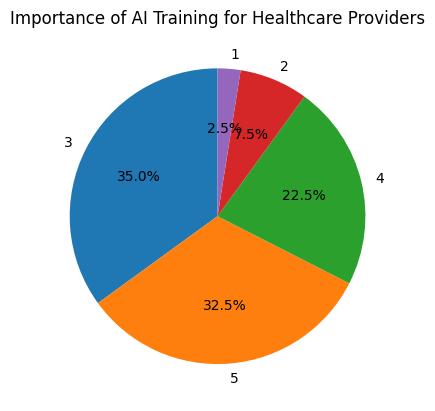

In [8]:
# Pie chart for importance of AI training
df['importance'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Importance of AI Training for Healthcare Providers')
plt.ylabel('')
plt.show()

In [16]:
from scipy.stats import chi2_contingency

# Contingency table between 'familiarity' and 'confidence'
contingency_table = pd.crosstab(df['familiarity'], df['confidence'])

# Performing chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 10.153636363636364
P-value: 0.25440786823238654
